In this notebook, we use a small data set cats_and_dogs_small from Kaggle to practice CNN model. In terms of the model, 4 convolution layers with 4 maxpool layers are used at first. Then we flatten the output data from last layer, namely the 4-th maxpool layer. For solving the overfitting, we also use a dropout layer before fed into the last 2 dense layers. Another method used to tackling the overfitting in this network is data augmentation which is famous in machine vision.

In [23]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os, shutil
import cv2
import numpy as np

## Preparing data

In [24]:
base_dir = '/Users/zhiruitang/Desktop/Deep_Learning/Jupyter_Code_DL/Convolution_neural_networks/cats_and_dogs_small'

#paths of train, validation, and test data
train_dir = os.path.join(base_dir, 'train') 
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

#check how many images in each folder
print('#training images of cat', len(os.listdir(train_cats_dir)))
print('#training images of dog', len(os.listdir(train_dogs_dir)))
print('#validation images of cat', len(os.listdir(validation_cats_dir)))
print('#validation images of dog', len(os.listdir(validation_dogs_dir)))
print('#test images of cat', len(os.listdir(test_cats_dir)))
print('#test images of dog', len(os.listdir(test_dogs_dir)))

#Show one of images and print the size of this image
img = cv2.imread(train_cats_dir+'/cat.1.jpg')
print(img.shape)
#cv2.imshow('cat.0.jpg', img)
#cv2.waitKey(0)


#training images of cat 1000
#training images of dog 1000
#validation images of cat 500
#validation images of dog 500
#test images of cat 500
#test images of dog 500
(280, 300, 3)


## Constructing newtork

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 15, 15, 128)      

## Compiling

In [26]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

## Preprocessing data

In [27]:
train_datagen = ImageDataGenerator(
    rescale=1./255, #scale the value of pixels into [0,1]
    rotation_range = 40, #Augmentation
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True) 

#validation data shouldn’t be augmented
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size = (150,150),  #for feeding images, let the size of all images be 150*150
    batch_size = 20, 
    class_mode = 'binary') #binaryentropy is used, so the labels should  be binary

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

#check the data generating from generators
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


## Training 

We can train mode by `fit()` method, but here data can be trained from generator by method `fit_generator()`

In [28]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50)

#save model after training
model.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 41s 413ms/step - loss: 0.6945 - acc: 0.5125 - val_loss: 0.6707 - val_acc: 0.5220
Epoch 2/30
100/100 [==============================] - 42s 415ms/step - loss: 0.6883 - acc: 0.5315 - val_loss: 0.6991 - val_acc: 0.5500
Epoch 3/30
100/100 [==============================] - 42s 422ms/step - loss: 0.6670 - acc: 0.5870 - val_loss: 0.6698 - val_acc: 0.5450
Epoch 4/30
100/100 [==============================] - 42s 420ms/step - loss: 0.6583 - acc: 0.6005 - val_loss: 0.6026 - val_acc: 0.6410
Epoch 5/30
100/100 [==============================] - 42s 419ms/step - loss: 0.6390 - acc: 0.6330 - val_loss: 0.7792 - val_acc: 0.6380
Epoch 6/30
100/100 [==============================] - 42s 421ms/step - loss: 0.6237 - acc: 0.6475 - val_loss: 0.7150 - val_acc: 0.6600
Epoch 7/30
100/100 [==============================] - 42s 423ms/step - loss: 0.5999 - acc: 0.6645 - val_loss: 0.6035 - val_acc: 0.6560
Epoch 8/30
100/100 [==============================] - 4

## Ploting curves of loss and acc. 

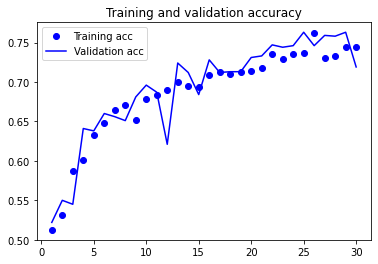

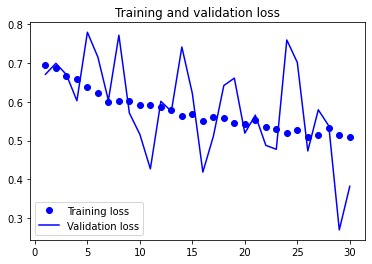

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()

plt.show()